In [1]:
cd /Users/eechris/code/src/github.com/cpjobling/eg-150-textbook/laplace_transform/matlab/
clearvars
format compact
syms t L R C i_R(t) v_R(t) i_L(t) v_L(t) v_C(t) i_C(t)

In [2]:
eqvrt = v_R(t) == R * i_R(t)

In [3]:
eqirt = isolate(eqvrt,i_R(t))

In [4]:
eqvlt = v_L(t) == L*diff(i_L(t))

In [5]:
int(lhs(eqvlt)) == int(rhs(eqvlt));
eqilt = isolate(ans,i_L(t))

In [6]:
eqict = i_C(t) == C * diff(v_C(t))

In [7]:
int(lhs(eqict)) == int(rhs(eqict));
eqvct = isolate(ans,v_C(t))

In [8]:
open solution12_3

In [9]:
syms s t vout Vout

eq45 = (Vout - 1 - 3/s)/(1/s + 2 + s/2) + Vout/1 + Vout/(s/2) == 0

Vout = solve(eq45, Vout)

In [10]:
Ds = s^3 + 8*s^2 + 10*s + 4

In [11]:
d = sym2poly(Ds)

d = 1×4 double
     1     8    10     4

In [12]:
format long
p = roots(d)

p = 
 -6.570750563722639 + 0.000000000000000i
 -0.714624718138679 + 0.313161257350729i
 -0.714624718138679 - 0.313161257350729i

In [13]:
p1 = p(1)

p1 =   -6.570750563722639

In [14]:
qs = expand((s - p(2))*(s - p(3)))

In [15]:
q = sym2poly(qs)

q = 1×3 double
   1.000000000000000   1.429249436277358   0.608758460880276

In [16]:
Ns = 2*s*(s + 3)

In [17]:
Ds = (s - p1)*qs 
Vout = Ns/Ds

In [18]:
vout = ilaplace(Vout)

In [19]:
var = vpa(vout,3)

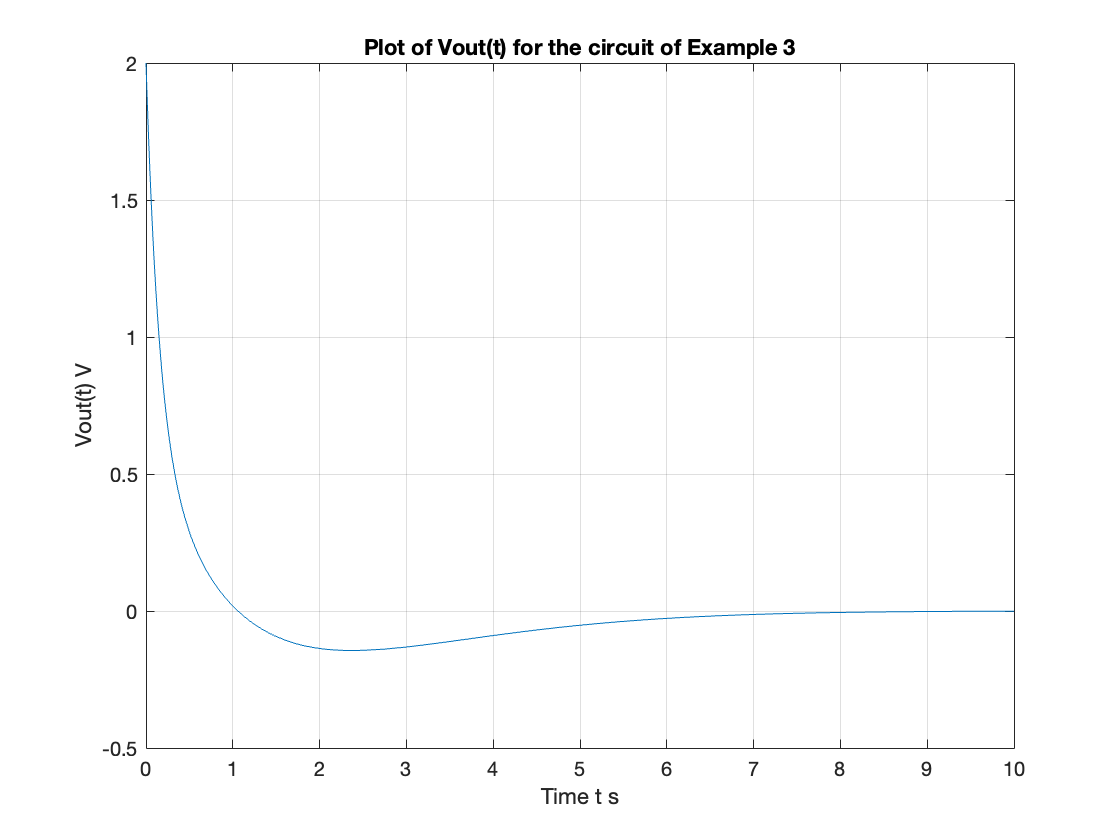

In [20]:
fplot(vout,[0,10]),...
    ylim([-0.5,2]),...
    grid,...
    title('Plot of Vout(t) for the circuit of Example 3'),...
    ylabel('Vout(t) V'),...
    xlabel('Time t s')

In [21]:
Vout = tf(2*conv([1, 0],[1, 3]),[1, 8, 10, 4])

Vout

 =


       2 s^2 + 6 s


  ----------------------


  s^3 + 8 s^2 + 10 s + 4


Continuous-time transfer function.

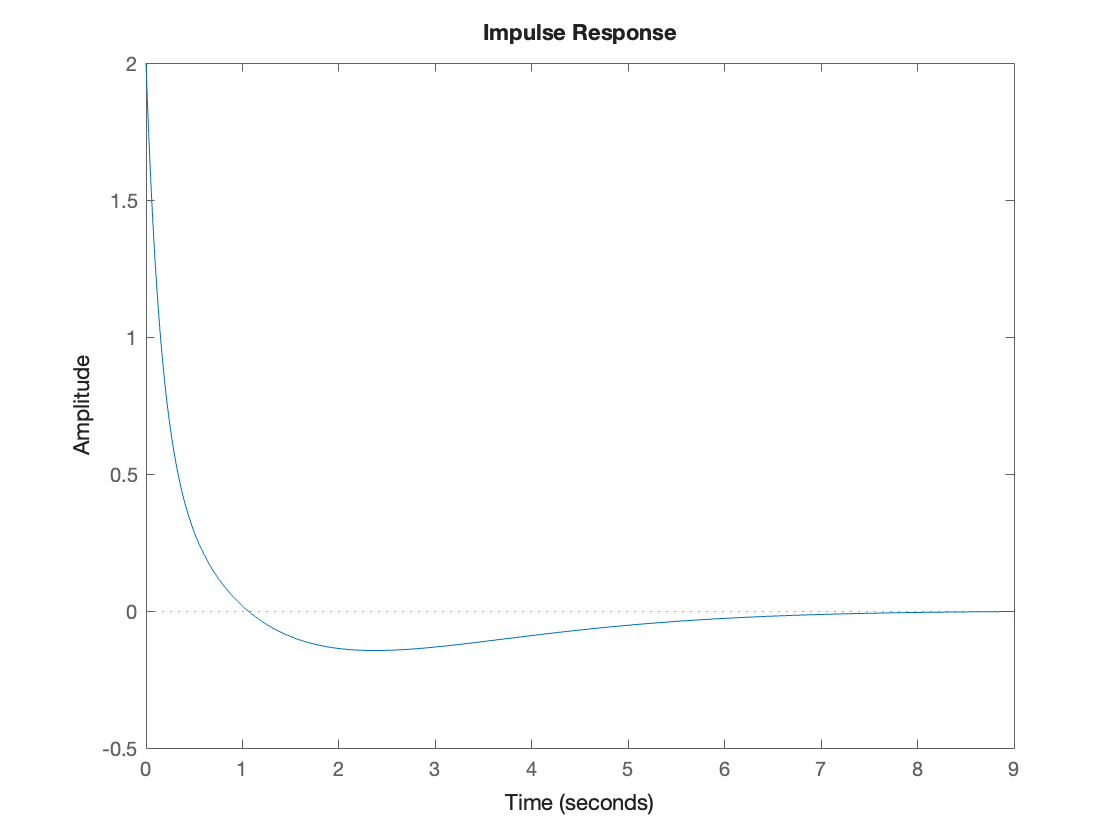

In [22]:
impulse(Vout)

In [23]:
syms s;

z1 = 13*s + 8/s;
z2 = 5*s + 10;
z3 = 20 + 16/s;

In [24]:
z = z1 + z2 * z3 /(z2 + z3)

In [25]:
z10 = simplify(z)

In [26]:
pretty(z10)

    4        3        2
65 s  + 490 s  + 528 s  + 400 s + 128
-------------------------------------
               2
         s (5 s  + 30 s + 16)


In [27]:
y10 = 1/z10;
pretty(y10)

               2
         s (5 s  + 30 s + 16)
-------------------------------------
    4        3        2
65 s  + 490 s  + 528 s  + 400 s + 128
